# Exercise: Supervised learning

Recall our farming scenario, in which we want to look at how January temperatures have changed over time. Now, we'll build a model that achieves this by using supervised learning. 

With many libraries, we can build a model in only a few lines of code. Here, we'll break down the process into steps so that we can explore how things work.

## Four components
Recall that there are four key components to supervised learning: the data, the model, the cost function, and the optimizer. Let's inspect these one at a time.

### 1. The data

We'll use publicly available weather data for Seattle. Let's load that and restrict it to January temperatures.

In [5]:
import pandas
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/m0b_optimizer.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv

# Load a file that contains weather data for Seattle
data = pandas.read_csv('seattleWeather_1948-2017.csv', parse_dates=['date'])

# Keep only January temperatures
data = data[[d.month == 1 for d in data.date]].copy()


# Print the first and last few rows
# Remember that with Jupyter notebooks, the last line of 
# code is automatically printed
data

--2024-01-31 03:06:39--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21511 (21K) [text/plain]
Saving to: ‘graphing.py.1’

graphing.py.1       100%[===================>]  21.01K  --.-KB/s    in 0.005s  

2024-01-31 03:06:39 (4.05 MB/s) - ‘graphing.py.1’ saved [21511/21511]

--2024-01-31 03:06:39--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/m0b_optimizer.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... co

,date,amount_of_precipitation,max_temperature,min_temperature,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25229,2017-01-27,0.00,54,37,False
25230,2017-01-28,0.00,52,37,False
25231,2017-01-29,0.03,48,37,True
25232,2017-01-30,0.02,45,40,True


We have data from 1948 to 2017, split across 2,170 rows. 

We'll analyze the relationship between `date` and daily minimum temperatures. Let's take a quick look at our data as a graph. 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


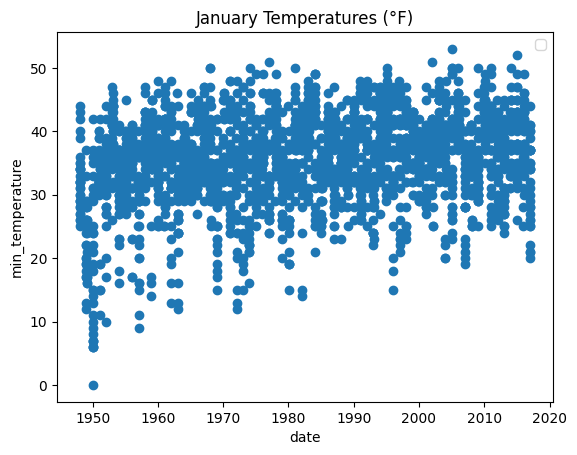

In [7]:
#import graphing # Custom graphing code. See our GitHub repository for details
import matplotlib.pyplot as plt

# Let's take a quick look at our data
#graphing.scatter_2D(data, label_x="date", label_y="min_temperature", title="January Temperatures (°F)")

plt.scatter(data["date"], data["min_temperature"])
# add labels and legend
plt.xlabel("date")
plt.ylabel("min_temperature")
plt.title("January Temperatures (°F)")
plt.legend()


Machine learning usually works best when the X and Y axes have roughly the same range of values. We'll cover why in later learning material. For now, let's just scale our data slightly.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


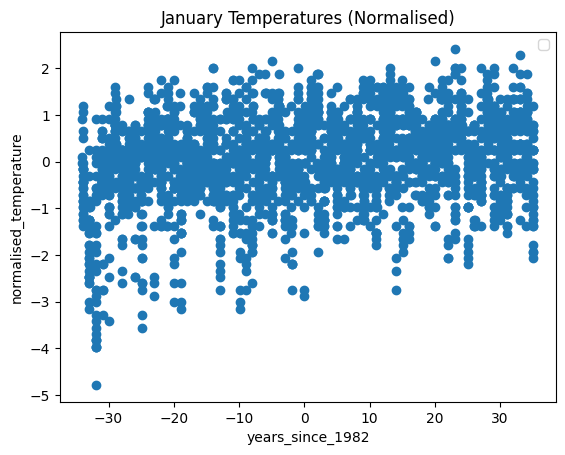

In [9]:
import numpy as np

# This block of code scales and offsets the data slightly, which helps the training process
# You don't need to understand this code. We'll cover these concepts in later learning material

# Offset date into number of years since 1982
data["years_since_1982"] = [(d.year + d.timetuple().tm_yday / 365.25) - 1982 for d in data.date]

# Scale and offset temperature so that it has a smaller range of values
data["normalised_temperature"] = (data["min_temperature"] - np.mean(data["min_temperature"])) / np.std(data["min_temperature"])

# Graph
#graphing.scatter_2D(data, label_x="years_since_1982", label_y="normalised_temperature", title="January Temperatures (Normalised)")

plt.scatter(data["years_since_1982"], data["normalised_temperature"])
# add labels and legend
plt.xlabel("years_since_1982")
plt.ylabel("normalised_temperature")
plt.title("January Temperatures (Normalised)")
plt.legend()

### 2. The model

We'll select a simple linear-regression model. This model uses a line to make estimates. You might have come across trendlines like these before when making graphs.

In [10]:
class MyModel:

    def __init__(self):
        '''
        Creates a new MyModel
        '''
        # Straight lines described by two parameters:
        # The slope is the angle of the line
        self.slope = 0
        # The intercept moves the line up or down
        self.intercept = 0

    def predict(self, date):
        '''
        Estimates the temperature from the date
        '''
        return date * self.slope + self.intercept

# Create our model ready to be trained
model = MyModel()

print("Model made!")

Model made!


We wouldn't normally use a model before it's been trained, but for the sake of learning, let's take a quick look at it.

Model parameters before training: 0, 0
Model visualised before training:


ValueError: x and y must have same first dimension, but have shapes (2170,) and (1,)

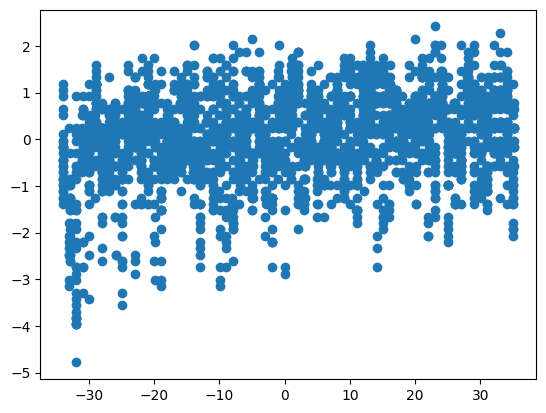

In [16]:
print(f"Model parameters before training: {model.intercept}, {model.slope}")

# Look at how well the model does before training
print("Model visualised before training:")
#graphing.scatter_2D(data, "years_since_1982", "normalised_temperature", trendline=model.predict)   

plt.scatter(data["years_since_1982"], data["normalised_temperature"])
plt.plot(data["years_since_1982"], model.predict, 'r', label='Fitted line')

                                                 
# add labels and legend
plt.xlabel("years_since_1982")
plt.ylabel("normalised_temperature")
plt.legend()

You can see that before training, our model (the red line) isn't useful at all. It always simply predicts zero.

### 3. The cost (objective) function

Our next step is to create a _cost function_ (_objective function_).

These functions in supervised learning compare the model's estimate to the correct answer. In our case, our label is temperature, so our cost function compares the estimated temperature to temperatures seen in the historical records.

In [ ]:
def cost_function(actual_temperatures, estimated_temperatures):
    '''
    Calculates the difference between actual and estimated temperatures
    Returns the difference, and also returns the squared difference (the cost)

    actual_temperatures: One or more temperatures recorded in the past
    estimated_temperatures: Corresponding temperature(s) estimated by the model
    '''

    # Calculate the difference between actual temperatures and those
    # estimated by the model
    difference = estimated_temperatures - actual_temperatures

    # Convert to a single number that tells us how well the model did
    # (smaller numbers are better)
    cost = sum(difference ** 2)

    return difference, cost

### 4. The optimizer

The optimizer's role is to guess new parameter values for the model. 

We haven't covered optimizers in detail yet, so to make things simple, we'll use an prewritten optimizer. You don't need to understand how this works, but if you're curious, you can find it in our GitHub repository. 

In [ ]:
from m0b_optimizer import MyOptimizer

# Create an optimizer
optimizer = MyOptimizer()

## The training loop

Let's put these components together so that they train the model. 

First, let's make a function that performs one iteration of training. Read each step carefully in the following code. If you want, add some `print()` statements inside the method to help you see the training in action.

In [ ]:
def train_one_iteration(model_inputs, true_temperatures, last_cost:float):
    '''
    Runs a single iteration of training.


    model_inputs: One or more dates to provide the model (dates)
    true_temperatues: Corresponding temperatures known to occur on those dates

    Returns:
        A Boolean, as to whether training should continue
        The cost calculated (small numbers are better)
    '''

    # === USE THE MODEL ===
    # Estimate temperatures for all data that we have
    estimated_temperatures = model.predict(model_inputs)

    # === OBJECTIVE FUNCTION ===
    # Calculate how well the model is working
    # Smaller numbers are better 
    difference, cost = cost_function(true_temperatures, estimated_temperatures)

    # Decide whether to keep training
    # We'll stop if the training is no longer improving the model effectively
    if cost >= last_cost:
        # Stop training
        return False, cost
    else:
        # === OPTIMIZER ===
        # Calculate updates to parameters
        intercept_update, slope_update = optimizer.get_parameter_updates(model_inputs, cost, difference)

        # Change the model parameters
        model.slope += slope_update
        model.intercept += intercept_update

        return True, cost

print("Training method ready")

Let's run a few iterations manually, so that you can watch how training works.

Run the following code several times and note how the model changes.

In [ ]:
import math

print(f"Model parameters before training:\t\t{model.intercept:.8f},\t{model.slope:.8f}")

continue_loop, cost = train_one_iteration(model_inputs = data["years_since_1982"],
                                                    true_temperatures = data["normalised_temperature"],
                                                    last_cost = math.inf)

print(f"Model parameters after 1 iteration of training:\t{model.intercept:.8f},\t{model.slope:.8f}")


It'll take thousands of iterations to train the model well, so let's wrap it in a loop.

In [ ]:

# Start the loop
print("Training beginning...")
last_cost = math.inf
i = 0
continue_loop = True
while continue_loop:

    # Run one iteration of training
    # This will tell us whether to stop training, and also what
    # the cost was for this iteration
    continue_loop, last_cost = train_one_iteration(model_inputs = data["years_since_1982"],
                                                    true_temperatures = data["normalised_temperature"],
                                                    last_cost = last_cost)
   
    # Print the status
    if i % 400 == 0:
        print("Iteration:", i)

    i += 1

    
print("Training complete!")
print(f"Model parameters after training:\t{model.intercept:.8f},\t{model.slope:.8f}")
graphing.scatter_2D(data, "years_since_1982", "normalised_temperature", trendline=model.predict)    

Notice how now that the model is trained, it's giving more sensible predictions about January temperatures.

Interestingly, the model shows temperatures going up over time. Perhaps we need to stop feeding grain to our elk earlier in the year!

## Summary

In this exercise, we split up supervised learning into its individual stages to see what's going on in code when we use third-party libraries. The important point to take away is how these pieces fit together. Note that most parts of this process require data.